## * Import Data Into Project * ##

In [ ]:
# Import libraries
import os
import cv2
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path
from keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from utils import import_train, import_others, view_train_images


In [2]:
# paths for data
train_dir = "C:/Users/RoiMinuit/Desktop/data/ILSVRC/Data/CLS-LOC/train"
test_dir = "C:/Users/RoiMinuit/Desktop/data/ILSVRC/Data/CLS-LOC/val"
val_dir = "C:/Users/RoiMinuit/Desktop/data/ILSVRC/Data/CLS-LOC/test"


In [3]:
# import images
train_images, train_labels = import_train(train_dir, 5000)
test_images = import_others(test_dir, 750)
val_images = import_others(val_dir, 750)


Images processed: 1250 (25%)
Images processed: 2500 (50%)
Images processed: 3750 (75%)
Function processed C:/Users/RoiMinuit/Desktop/data/ILSVRC/Data/CLS-LOC/train in 40 seconds.

Images processed: 375 (50%)
Function processed C:/Users/RoiMinuit/Desktop/data/ILSVRC/Data/CLS-LOC/val in 5 seconds.

Images processed: 375 (50%)
Function processed C:/Users/RoiMinuit/Desktop/data/ILSVRC/Data/CLS-LOC/test in 6 seconds.



## * Inspect Images * ##

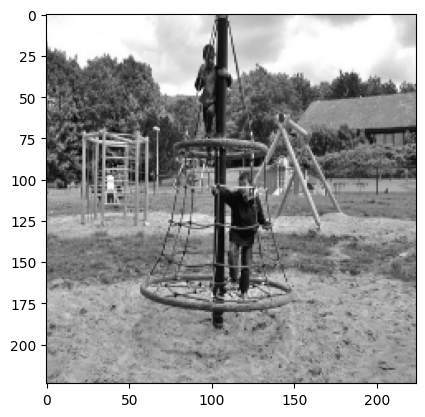

swing


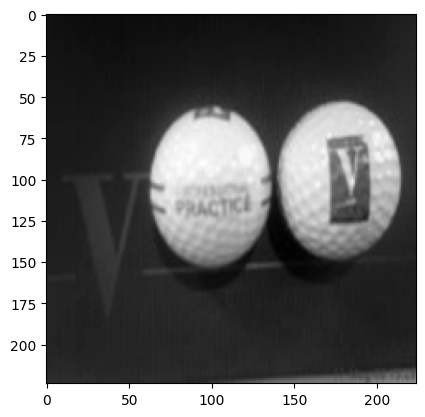

golf_ball


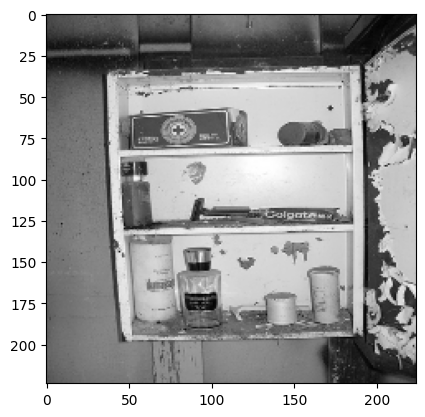

medicine_chest


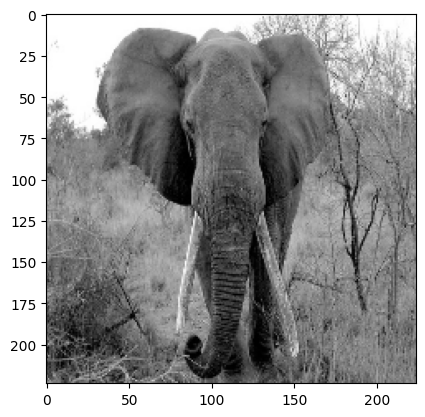

tusker


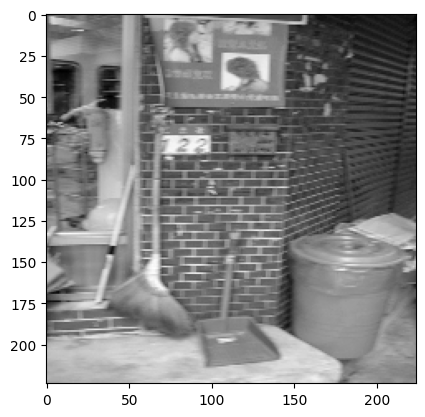

broom


In [4]:
# view train images
view_train_images(train_images, train_labels)

In [15]:
# type of images
for image in train_images:
    print(type(image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

In [5]:
# check the shape of images
for i in range(0, 5):
    print(train_images[i].shape)

(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)
(224, 224, 1)


## 1) Edge Detection ##

In [6]:
# define edge detection function

def edge_detection(image_arr, low_threshold = 100, high_threshold = 200):
    """ Detect edges in an image """
    # remove single channel dimension
    image_arr = image_arr.squeeze()
    # convert to uint8
    if image_arr.dtype != np.uint8:
        image_arr = (image_arr * 255).astype(np.uint8)
    # detect edges
    edges = cv2.Canny(image_arr, low_threshold, high_threshold)
    return edges

In [7]:
# perform edge detection on images
train_edge_images = [edge_detection(image) for image in train_images]

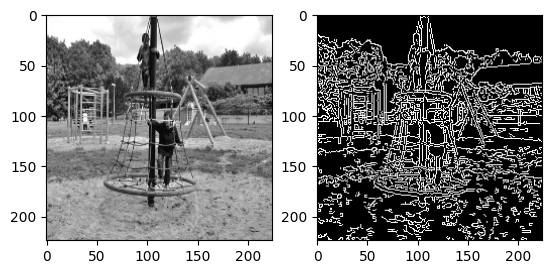

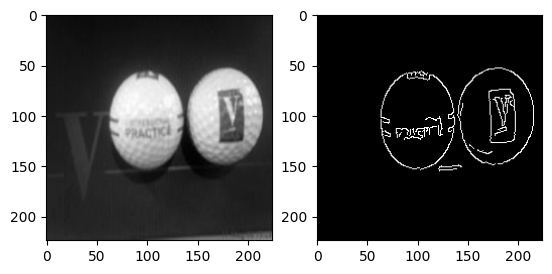

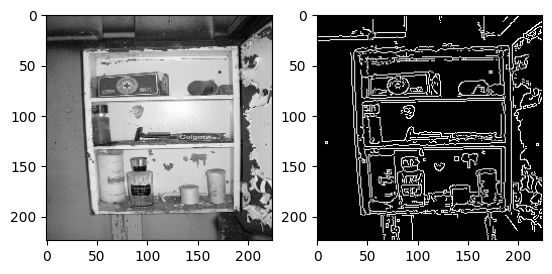

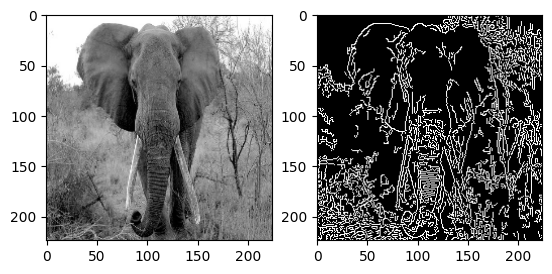

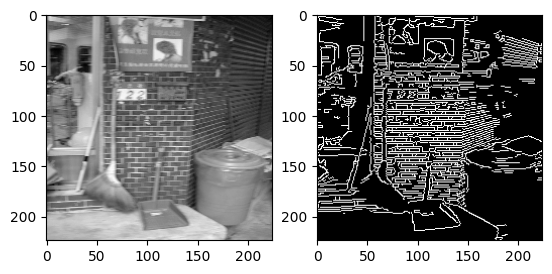

In [8]:
# view edged image
def view_edged_image(image_arrays, image_edge, n):
    """ View an image array """
    for i in range(0, n):
        plt.subplot(1, 2, 1)
        plt.imshow(image_arrays[i], cmap='gray')
        plt.subplot(1, 2, 2)
        plt.imshow(image_edge[i], cmap='gray')
        plt.show()

view_edged_image(train_images, train_edge_images, 5)

## * Machine Learning * ##

## 1) Build CNN Model ##

In [ ]:
# build a convolutional neural network (CNN) model
CNN = keras.Sequential([
        
])

In [11]:
# prepare data for training
X_train = np.array(train_images)
Y_train = [str(s) for s in train_labels]
Y_train = LabelEncoder.fit_transform(Y_train)
Y_train = to_categorical(Y_train, num_classes=1000)

In [14]:
print('Original Label', train_labels[:5])
print('Encoded Label', Y_train[:5])

Original Label ['mashed_potato', 'mongoose', 'sliding_door', 'rotisserie', 'black-footed_ferret']
Encoded Label [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
